# Introduction

In this notebook, we will be looking at the convergence criteria for a quasi-exact solution to understand the convergence behavior.


In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#sys.path.append(module_path)

from ks_solver import *


In [2]:
CFL = 0.01

# Quasi-Exact Solution

For the quasi-exact solution, we will perform the calculation on a very fine mesh compared to the "inexact" meshes to create a mesh that is something of an exact solution.


In [3]:
x = np.linspace( 0 , 1 , num=1000 )
t_bounds = (0,1)

u_0 = np.sin( 2 * np.pi * x )

dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_qexact = KS( x , u_0 , t_bounds , dt , alpha=-0.1e-6 , gamma=0.01e-9 )
ks_qexact.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:203: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  cls.A_advect[np.abs(cls.A_advect)*cls.dx<=zero_tol]=0
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:456: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:470: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_1[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_1[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:483: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_2[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_2[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CF

Hello there


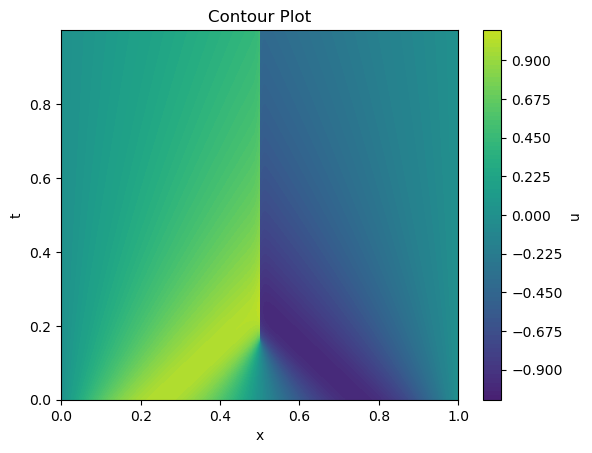

In [4]:
x = ks_qexact.x
y = ks_qexact.t
X , Y = np.meshgrid( x , y )
Z = ks_qexact.u

# Set the limits for the color scale
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis', vmin=-1.3, vmax=1.3 )

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('u')

# Add axis labels
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour Plot')

plt.show()


# Numerical Solutions

Next, we can create numerical solutions that are less exact.


In [5]:
x = np.linspace( 0 , 1 , num=25 )
t_bounds = (0,1)

u_0 = np.sin( 2 * np.pi * x )

dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c1 = KS( x , u_0 , t_bounds , dt , alpha=-0.1e-6 , gamma=0.01e-9 )
ks_c1.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:442: RuntimeWarning: overflow encountered in square
  cls.v[i,:] = (cls.u[i,:]**2)/2


Hello there


In [6]:
x = np.linspace( 0 , 1 , num=50 )
t_bounds = (0,1)

u_0 = np.sin( 2 * np.pi * x )

CFL = 0.01
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c2 = KS( x , u_0 , t_bounds , dt , alpha=-0.1e-6 , gamma=0.01e-9 )
ks_c2.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:471: RuntimeWarning: overflow encountered in square
  cls.v_1[i,:] = (cls.u_1[i,:] ** 2)/2
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:484: RuntimeWarning: overflow encountered in square
  cls.v_2[i,:] = (cls.u_2[i,:] ** 2)/2


Hello there


In [7]:
x = np.linspace( 0 , 1 , num=100 )
t_bounds = (0,1)

u_0 = np.sin( 2 * np.pi * x )

dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c3 = KS( x , u_0 , t_bounds , dt , alpha=-0.1e-6 , gamma=0.01e-9 )
ks_c3.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:497: RuntimeWarning: overflow encountered in square
  cls.v_3[i,:] = (cls.u_3[i,:] ** 2)/2


Hello there


# Quasi-Exact Solution Comparison

Finally, we can compare these numerical solutions to the exact solution.


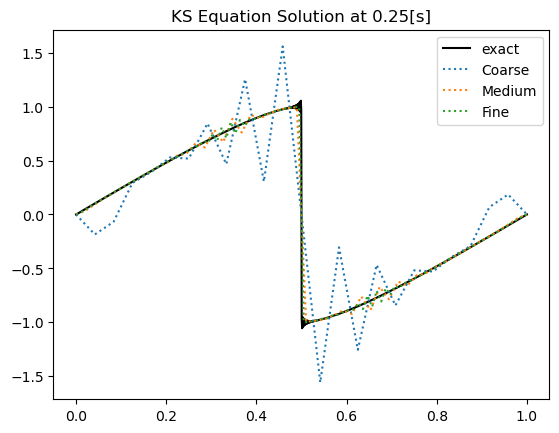

In [13]:
t_tol = 1e-3
t_step = 0.25
net_error = np.zeros(3)

# Exact solutions
y_exact = np.mean( ks_qexact.u[np.abs(ks_qexact.t/t_step-1)<=t_tol] , axis=0 )
plt.plot( ks_qexact.x , y_exact , 'k' , label="exact" )

# 25 points
error_1 = np.zeros_like( ks_c1.x )
y_1 = np.mean( ks_c1.u[np.abs(ks_c1.t/t_step-1)<=t_tol] , axis=0 )
plt.plot( ks_c1.x , y_1 , ':' , label=f"Coarse" )
error_1 = y_1 - np.interp( ks_c1.x , ks_qexact.x , y_exact )
net_error[0] = np.linalg.norm( error_1[2:-2] ) / len( error_1[2:-2] )

# 50 points
error_2 = np.zeros_like( ks_c2.x )
y_2 = np.mean( ks_c2.u[np.abs(ks_c2.t/t_step-1)<=t_tol] , axis=0 )
plt.plot( ks_c2.x , y_2 , ':' , label=f"Medium" )
error_2 = y_2 - np.interp( ks_c2.x , ks_qexact.x , y_exact )
net_error[1] = np.linalg.norm( error_2[2:-2] ) / len( error_2[2:-2] )

# 100 points
error_3 = np.zeros_like( ks_c3.x )
y_3 = np.mean( ks_c3.u[np.abs(ks_c3.t/t_step-1)<=t_tol] , axis=0 )
plt.plot( ks_c3.x , y_3 , ':' , label=f"Fine" )
error_3 = y_3 - np.interp( ks_c3.x , ks_qexact.x , y_exact )
net_error[2] = np.linalg.norm( error_3[2:-2] ) / len( error_3[2:-2] )


plt.title(f"KS Equation Solution at {t_step}[s]")
plt.legend( loc = "best" )


Text(0.5, 1.0, 'Convergence Plot for KS Equation')

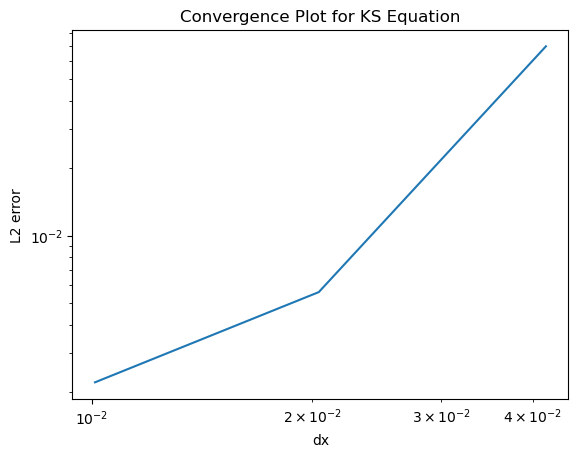

In [14]:
dx_s = [ ks_c1.dx , ks_c2.dx , ks_c3.dx ]

plt.loglog( dx_s , net_error )
plt.xlabel( "dx" )
plt.ylabel( "L2 error" )
plt.title("Convergence Plot for KS Equation")


In [15]:
conv_value = np.log( ( net_error[2] - net_error[1] ) / ( net_error[1] - net_error[0] ) ) / np.log( 2 ) 
conv_value



np.float64(-4.251008002413592)

In [16]:
conv_value = np.log( net_error[2] / net_error[1] ) / np.log( 2 ) 
conv_value


np.float64(-1.3379899209694204)